In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Importing necessary Libraries

In [2]:
# importing all libraries and dependencies for dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading and inspecting the dataframe

In [3]:
countries = pd.read_csv(r"Downloads\Country-data.csv")

In [4]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
countries.shape

(167, 10)

In [7]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Cleaning the Data

In [8]:
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### We can see that there are no missing values in the data

#### Converting % columns to actual values

In [9]:
# Converting exports,imports and health spending percentages to absolute values.

countries['exports'] =countries['exports'] * countries['gdpp']/100
countries['imports'] = countries['imports'] * countries['gdpp']/100
countries['health'] = countries['health'] * countries['gdpp']/100

In [10]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Data Visualisation

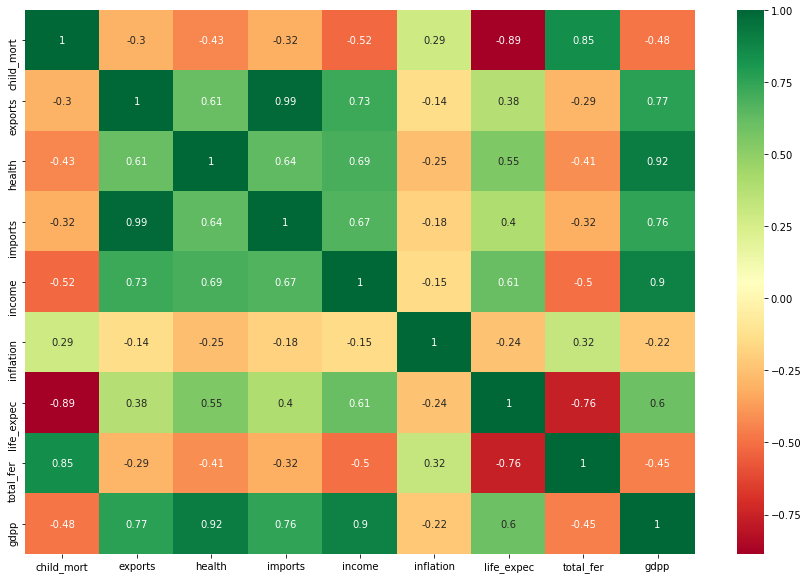

In [11]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
sns.heatmap(countries.corr(),annot = True,cmap='RdYlGn')

plt.show()

# The main observations are:

### Imports is highly correlated with exports
### Health is highly correlated with gdpp( Gross Domestic Product per capita)
### Total Fertility is highly correlated with Child mortality.

## Income versus Child mortality

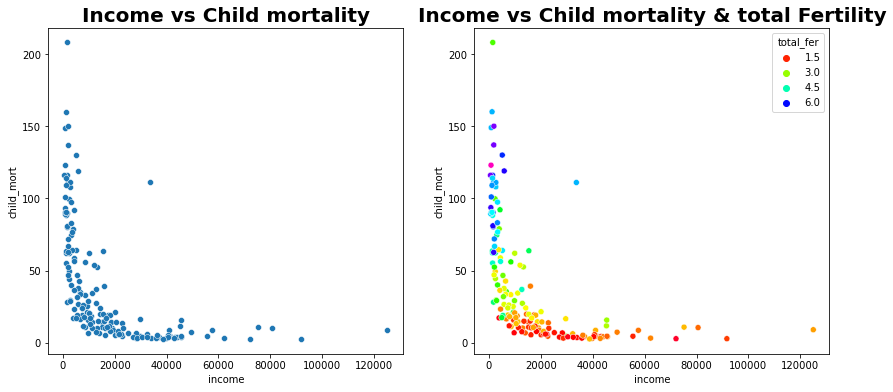

In [12]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='income',y='child_mort', data=countries)
plt.title('Income vs Child mortality',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='income',y='child_mort',hue='total_fer', data=countries, palette='gist_rainbow')
plt.title('Income vs Child mortality & total Fertility',fontweight="bold", size=20)
plt.show()

#### From the above graph we can see that the mortality is more when the income is low and decreases with an increase in income
#### We can also see that generally low income people have high fertility compared to high income people

## Pairplot

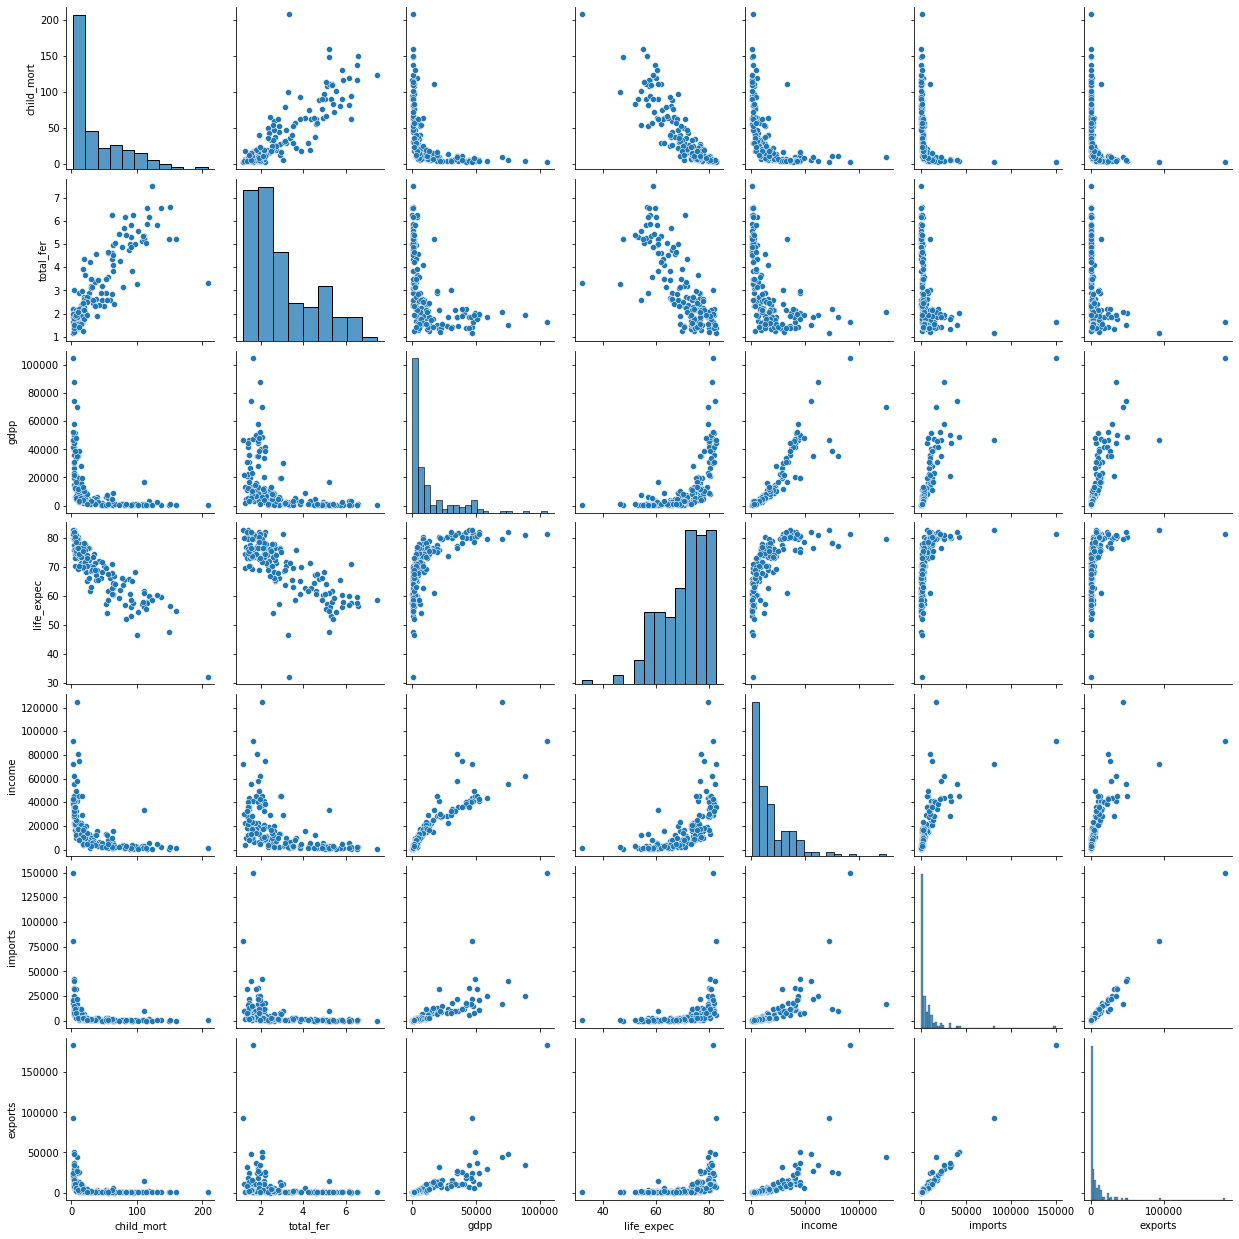

In [13]:
sns.pairplot(countries,vars=["child_mort", 'total_fer','gdpp','life_expec','income', 'imports', 'exports'], kind='scatter')
plt.show()

## Country versus Child Mortality

In [14]:
Country= countries.groupby('country').child_mort.sum().sort_values(ascending=False)
Country=pd.DataFrame(Country)
Country1=Country.head()
Country2=Country.tail()
print(Country.head())  
print(Country.tail())

                          child_mort
country                             
Haiti                          208.0
Sierra Leone                   160.0
Chad                           150.0
Central African Republic       149.0
Mali                           137.0
            child_mort
country               
Sweden             3.0
Finland            3.0
Singapore          2.8
Luxembourg         2.8
Iceland            2.6


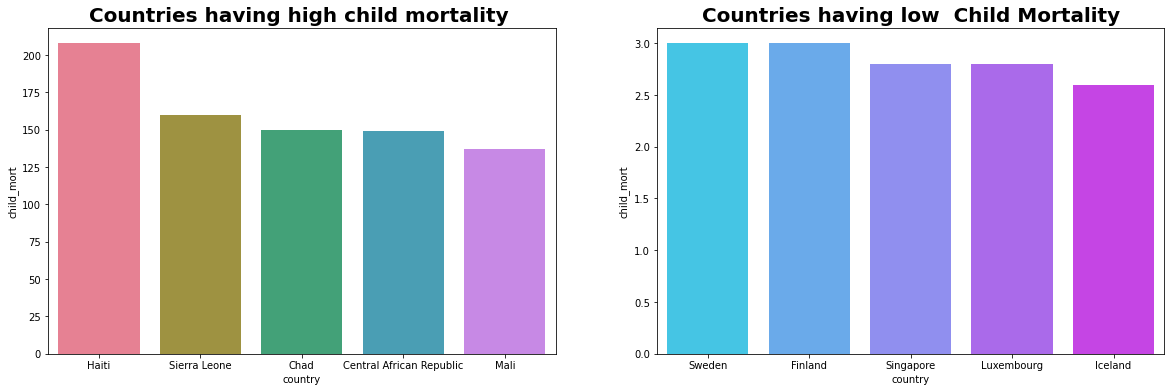

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Country1.index, Country1.child_mort, palette='husl')
plt.title('Countries having high child mortality ',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Country2.index, Country2.child_mort, palette='cool')
plt.title('Countries having low  Child Mortality',fontweight="bold", size=20)
plt.show()

### Haiti is a country with highest child mortality of around 208 out of 1000 live births. Next comes Sierra Leone
### Iceland and Luxembourg are the countries with less child mortality

### Country versus Income

In [16]:
Income= countries.groupby('country').income.sum().sort_values(ascending=False)
Income=pd.DataFrame(Income)
Income1=Income.head()
Income2=Income.tail()
print(Income1)
print(Income2)

            income
country           
Qatar       125000
Luxembourg   91700
Brunei       80600
Kuwait       75200
Singapore    72100
                          income
country                         
Central African Republic     888
Niger                        814
Burundi                      764
Liberia                      700
Congo, Dem. Rep.             609


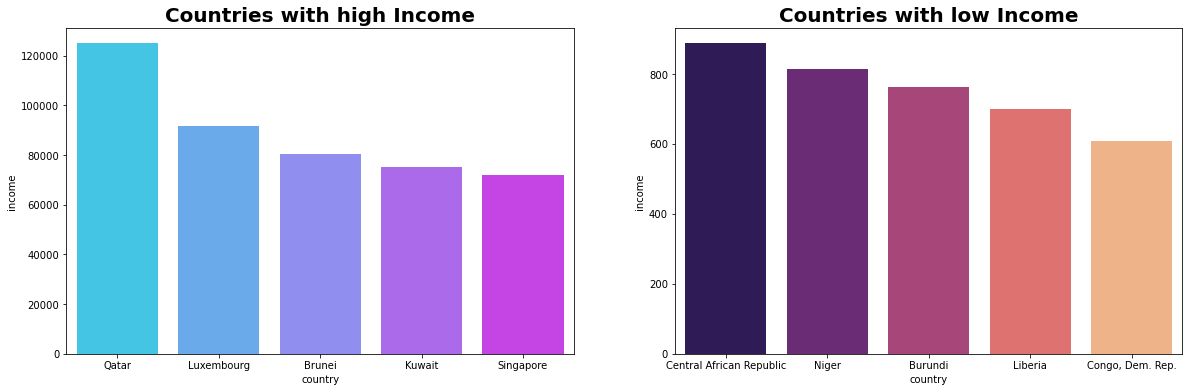

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Income1.index, Income1.income, palette='cool')
plt.title('Countries with high Income',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Income2.index, Income2.income, palette='magma')
plt.title('Countries with low Income',fontweight="bold", size=20)
plt.show()

#### Qatar has a pretty high net income per person
#### The people of Congo have very little income

## Country versus GDP

In [18]:
GDP= countries.groupby('country').gdpp.sum().sort_values(ascending=False)
GDP=pd.DataFrame(GDP)
GDP1=GDP.head()
GDP2=GDP.tail()
print(GDP1)
print(GDP2)

               gdpp
country            
Luxembourg   105000
Norway        87800
Switzerland   74600
Qatar         70300
Denmark       58000
                  gdpp
country               
Sierra Leone       399
Niger              348
Congo, Dem. Rep.   334
Liberia            327
Burundi            231


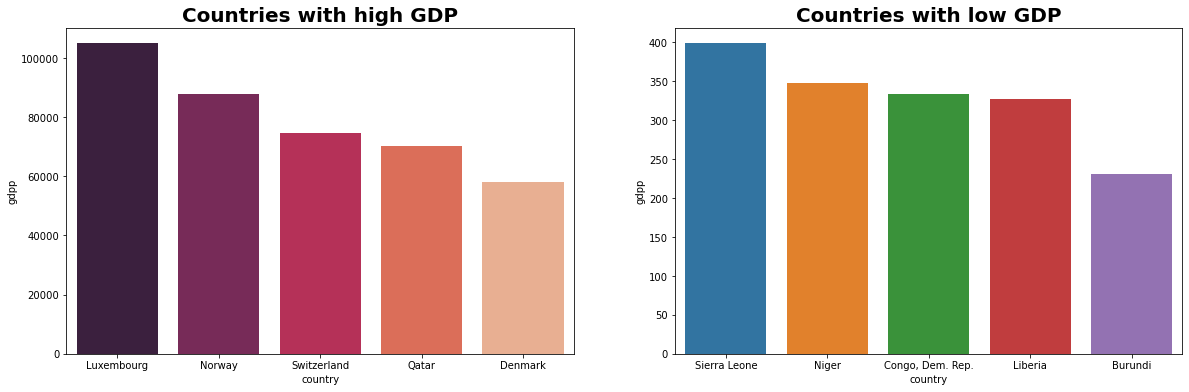

In [19]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(GDP1.index, GDP1.gdpp, palette='rocket')
plt.title('Countries with high GDP',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(GDP2.index, GDP2.gdpp)
plt.title('Countries with low GDP',fontweight="bold", size=20)
plt.show()

#### We can see that Luxembourg has high GDP per capita.
#### Burundi has very less GDP per capita

## Country vs Imports

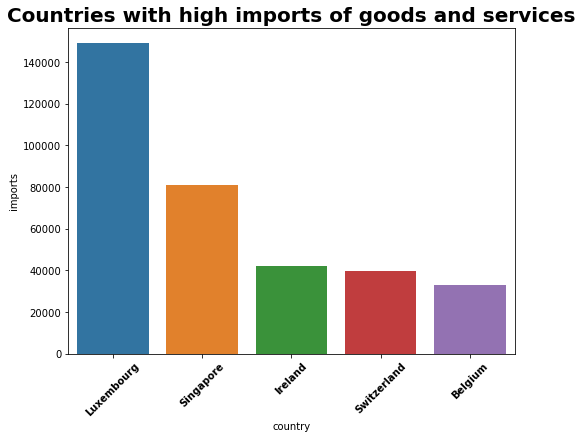

Text(0.5, 1.0, 'Countries with low imports of goods and services')

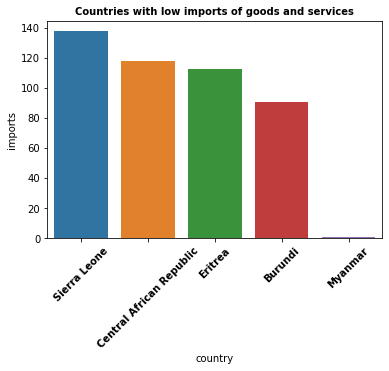

In [20]:
plt.figure(figsize=(8, 6))
Imports=countries.groupby('country').imports.sum().sort_values(ascending=False)
Imports= pd.DataFrame(Imports)
Imports1=Imports.head()
sns.barplot(Imports1.index,Imports1.imports)
plt.xticks(rotation = 45,fontweight="bold")
plt.title('Countries with high imports of goods and services',fontweight="bold", size=20)
plt.show()
Imports2=Imports.tail()
sns.barplot(Imports2.index,Imports2.imports)
plt.xticks(rotation = 45,fontweight="bold")
plt.title('Countries with low imports of goods and services',fontweight="bold",size=10)

In [21]:
Life_Ex= countries.sort_values(by=['life_expec'],ascending=True)
Life_Ex.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
166,Zambia,83.1,540.200,85.9940,451.140,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.10,53.1,5.31,459


In [22]:
Life_ex=countries.sort_values(by=['life_expec'],ascending=False)
display(Life_ex[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900


### We can see that Life expectancy is very less and child mortality is very high in Haiti
### Japan has highest life expectancy

In [23]:
Exports=countries.sort_values(by=['exports'], ascending= False)
display(Exports[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300


In [24]:
Export=countries.sort_values(by=['exports'], ascending= True)
display(Export[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988
26,Burundi,93.6,20.60520,26.7960,90.552000,764,12.30,57.7,6.26,231
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.01,47.5,5.21,446
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.44,56.2,5.82,553


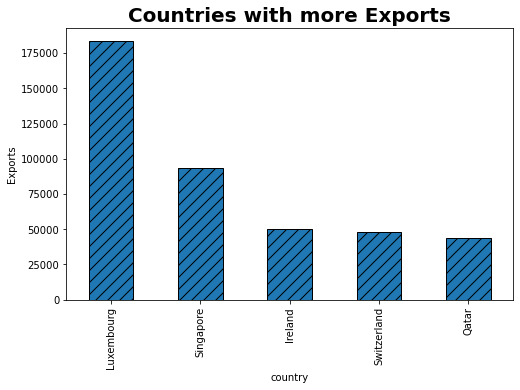

In [25]:
plt.figure(figsize=(8, 5))
countries.groupby('country').exports.sum().sort_values(ascending=False).head().plot.bar(hatch="//",edgecolor='k')
plt.ylabel('Exports')
plt.title('Countries with more Exports',fontweight="bold", size=20)
plt.show()

### Luxembourg has more export of goods and services due to which it has the highest GDP per capita
### Myanmar is the country with least exports and next to it is Burundi. Even Imports were less for these countries.

In [26]:
Health=countries.sort_values(by=['health'], ascending= True)
Health[0:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482
93,Madagascar,62.2,103.25000,15.5701,177.590000,1390,8.79,60.8,4.60,413
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.01,47.5,5.21,446
112,Niger,123.0,77.25600,17.9568,170.868000,814,2.55,58.8,7.49,348
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988


In [27]:
Health1=countries.sort_values(by=['health'], ascending= False)
Health1[0:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,6001.6,8663.60,7647.2,49400,1.220,78.7,1.93,48400
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000


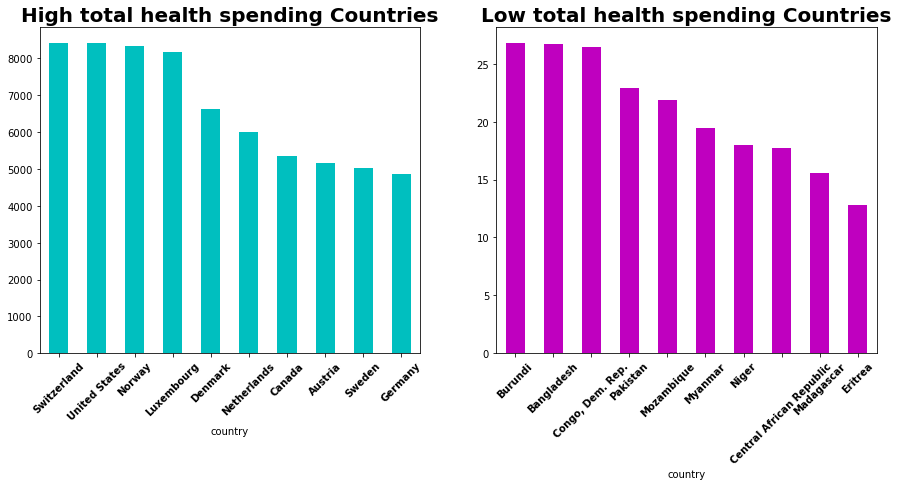

In [73]:
plt.figure(figsize=(15, 6))
He=countries.groupby('country').health.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
He1=He.head(10).plot.bar(color='c')
plt.title('High total health spending Countries',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
He2=He.tail(10).plot.bar(color='m')
plt.title('Low total health spending Countries',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

### United States spends more per person on health than comparable countries which is 8663.
### Eritrea spends less on health

In [29]:
Fertility=countries.sort_values(by=['total_fer'], ascending= True).head()
Fertility

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,93200.00,1845.36,81084.00,72100,-0.046,82.7,1.15,46600
138,South Korea,4.1,10917.40,1531.53,10210.20,30400,3.160,80.1,1.23,22100
67,Hungary,6.0,10715.80,960.23,10021.50,22300,2.330,74.5,1.25,13100
102,Moldova,17.2,638.96,190.71,1279.55,3910,11.100,69.7,1.27,1630
20,Bosnia and Herzegovina,6.9,1369.17,511.71,2364.93,9720,1.400,76.8,1.31,4610


In [30]:
Fertility1=countries.sort_values(by=['total_fer'], ascending=False).head()
Fertility1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.39,56.5,6.59,897
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231


In [31]:
countries.total_fer.max()

7.49

In [32]:
countries.life_expec.max()

82.8

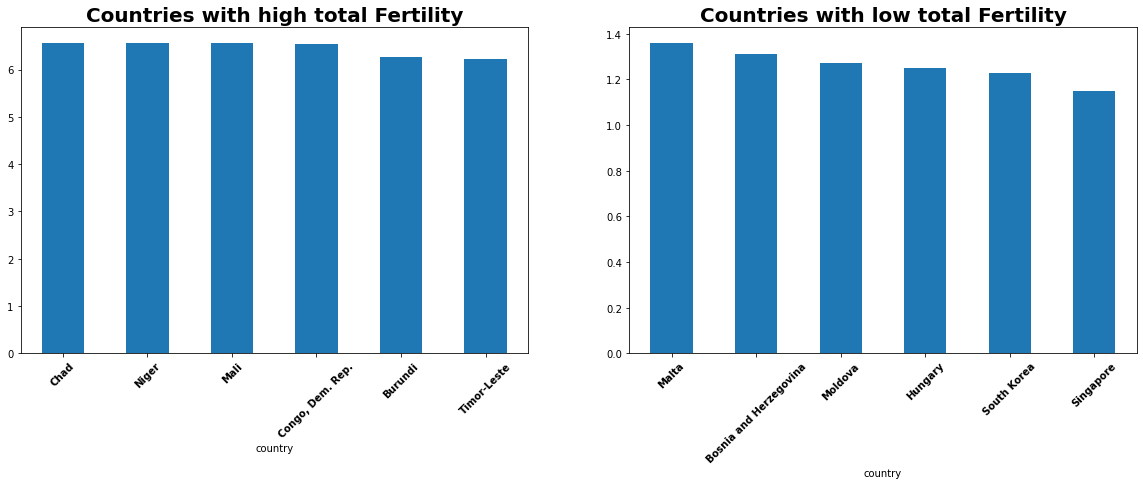

In [74]:
plt.figure(figsize=(20, 6))
Fe=countries.groupby('country').total_fer.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
Fe1=Fe.head(6).plot.bar()
plt.title('Countries with high total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
Fe2=Fe.tail(6).plot.bar()
plt.title('Countries with low total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

### Less number of children born to each woman can survive more.As we see Singapore, South Korea have more life expectancy and less total fertility.
### Chad, Mali and Congo Dem Republic have very high fertility and child morality

In [34]:
In=countries.sort_values(by=['inflation'], ascending=False).head()
In

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,1237.55,144.160,1502.55,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,79.20,328.320,1000.80,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700,24.9,60.9,5.21,17100


In [35]:
In=countries.sort_values(by=['inflation'], ascending=True).head()
In

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
131,Seychelles,14.4,10130.4,367.20,11664.0,20400,-4.210,73.4,2.17,10800
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800
135,Slovenia,3.2,15046.2,2201.94,14718.6,28700,-0.987,79.5,1.57,23400


### Nigeria is having high inflation rate where as Japan and Ireland has very less Inflation rates

### Checking Outliers

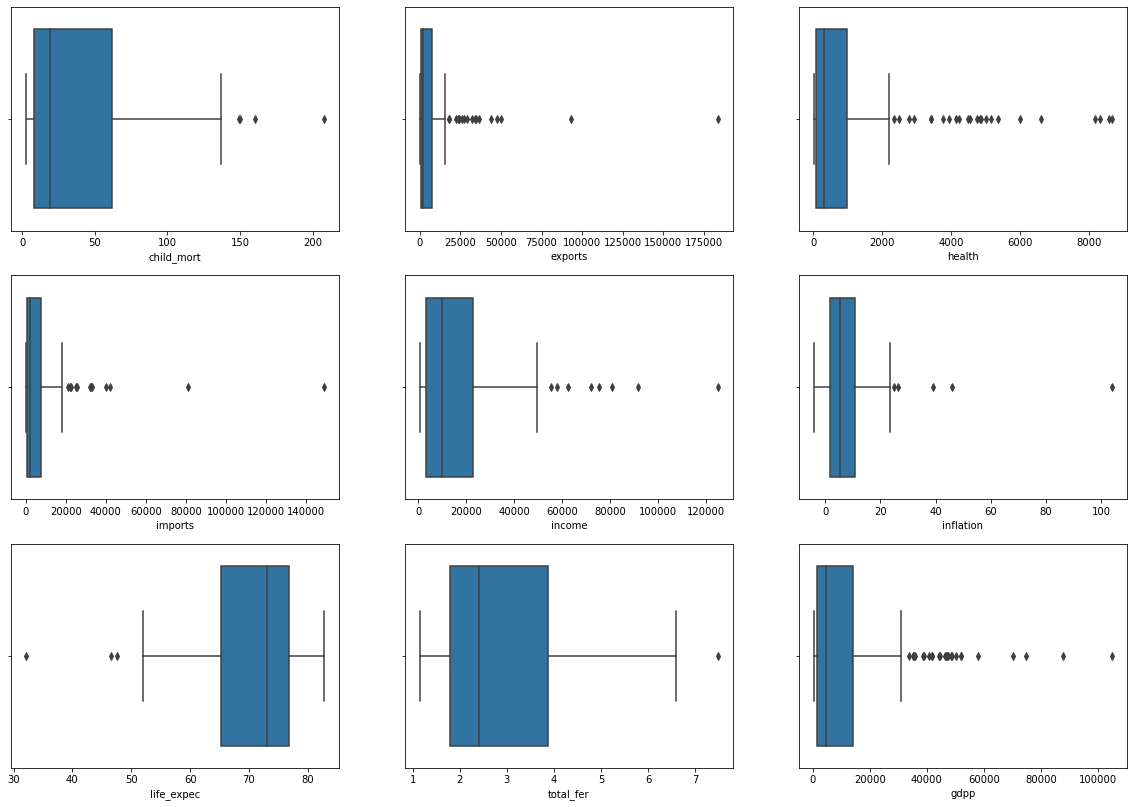

In [36]:
plt.figure(figsize = (20,14))
feature = countries.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(countries[i[1]])

### There are outliers in the data. we need to treat them as The clustering process is very sensitive to the presence of outliers in the data

### Outlier Treatment

In [37]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [38]:
#Capping
q2 = countries['imports'].quantile(0.99)
q3 = countries['health'].quantile(0.99)
q4 = countries['income'].quantile(0.99)
q5 = countries['inflation'].quantile(0.99)
q6 = countries['life_expec'].quantile(0.99)
q7 = countries['total_fer'].quantile(0.99)
q8 = countries['gdpp'].quantile(0.99)

countries['imports'][countries['imports']>= q2] = q2
countries['health'][countries['health']>= q3] = q3
countries['income'][countries['income']>= q4] = q4
countries['inflation'][countries['inflation']>= q5] = q5
countries['life_expec'][countries['life_expec']>= q6] = q6
countries['total_fer'][countries['total_fer']>= q7] = q7
countries['gdpp'][countries['gdpp']>= q8] = q8

In [39]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1054.206622,5873.135222,16857.550898,7.380970,70.551138,2.942259,12756.826347
std,40.328931,17973.885795,1790.845342,9422.700869,17957.012855,7.793224,8.886987,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


## Clustering

### Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(countries.drop('country', axis = 1))
df1 = pd.DataFrame(df1, columns = countries.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538949,-0.350191,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272833,-0.318526,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007808,-0.291375,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695634,-0.104331,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


## K-Mean Clustering

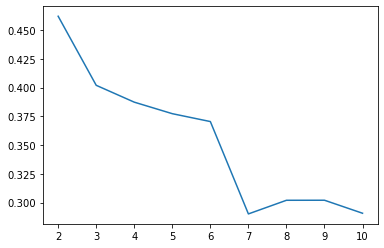

In [41]:
# Choose the value of K
# Silhouette score
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])
plt.show()

### From the plot of silhouette score above, We can see that we have the maximum at 2, and next maximum is at 3. So we can go with 3.

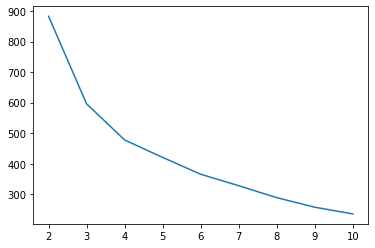

In [42]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

### From the elbow curve above we can see that we have a breakpoint at 3 and one breakpoint at 4.

### From both the plots above, We can go with the lower value for k, which is 3 here. So k=3

In [43]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [44]:
df_kmean = countries.copy()

In [45]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [46]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [47]:
df_kmean.label.value_counts()

0    89
2    48
1    30
Name: label, dtype: int64

### Cluster 0 has high number of data points compared to other two clusters

### Plotting the clusters

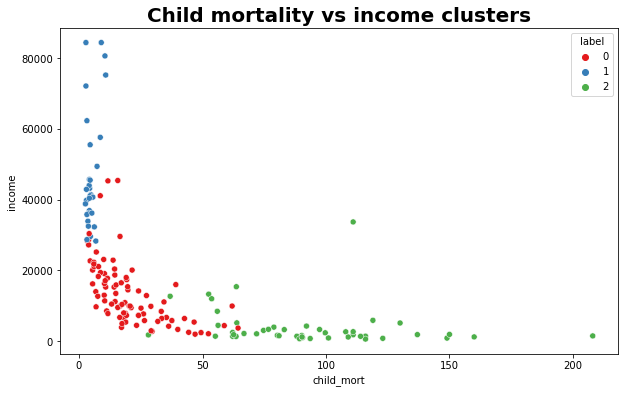

In [48]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')
plt.title('Child mortality vs income clusters',fontweight="bold", size=20)
plt.show()

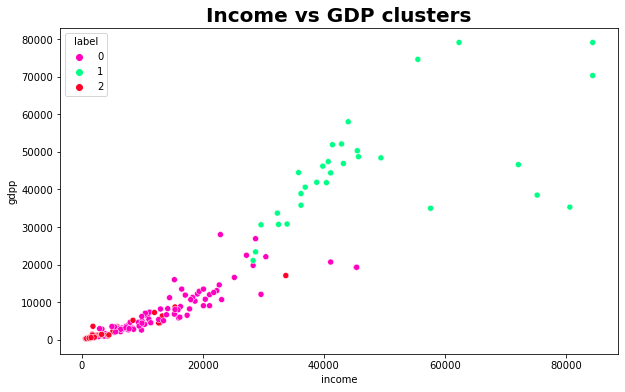

In [49]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'gist_rainbow_r')
plt.title('Income vs GDP clusters',fontweight="bold", size=20)
plt.show()

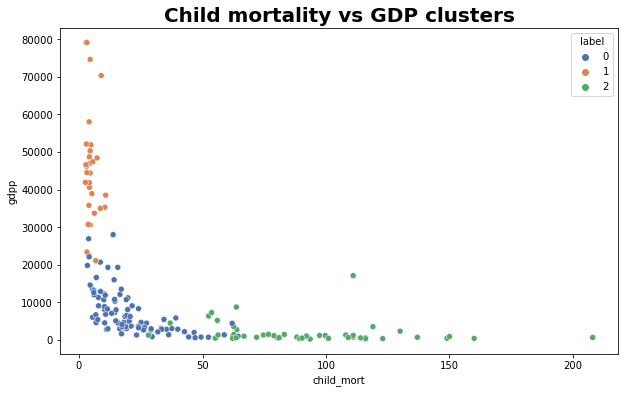

In [50]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'deep')
plt.title('Child mortality vs GDP clusters',fontweight="bold", size=20 )
plt.show()

### Cluster Profiling

In [51]:
# Making sense out of the clsuters by finding the mean
df2=df_kmean.drop('country', axis = 1).groupby('label').mean()
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,20.726966,3395.746051,508.603488,3515.332821,13626.853933,7.170955,73.303371,2.233596,7552.494382
1,4.970000,29827.563333,4175.845027,20941.719333,47178.266667,2.839800,80.484667,1.796667,45552.533333
2,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333


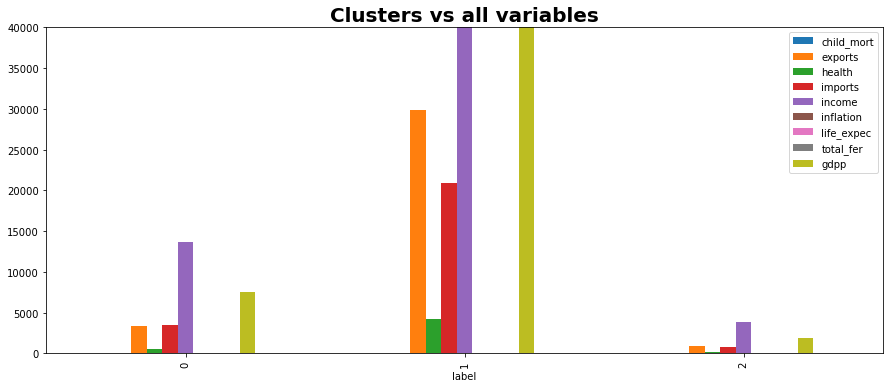

In [52]:
df_kmean.drop('country', axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.ylim([0,40000])
plt.title("Clusters vs all variables",fontweight="bold", size=20)
plt.show()

In [53]:
df_kmean.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'label'],
      dtype='object')

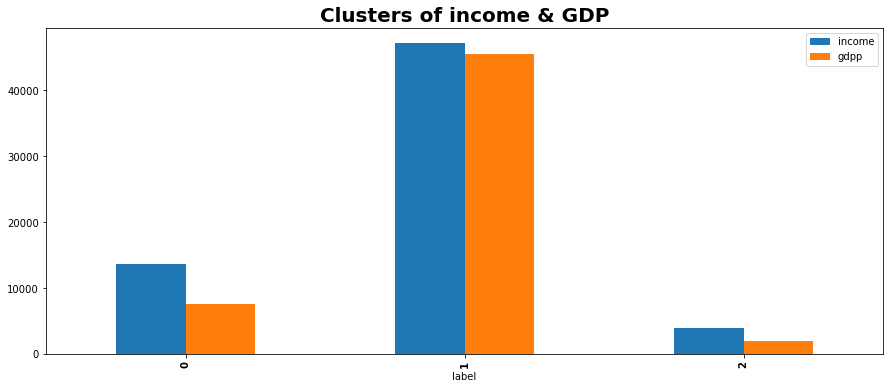

In [54]:
df_kmean.drop(['country', 'exports', 'health', 'imports','child_mort',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.title('Clusters of income & GDP',fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

### Cluster 1 is having high income and high GDP
### Cluster 2 is having very low income and GDP

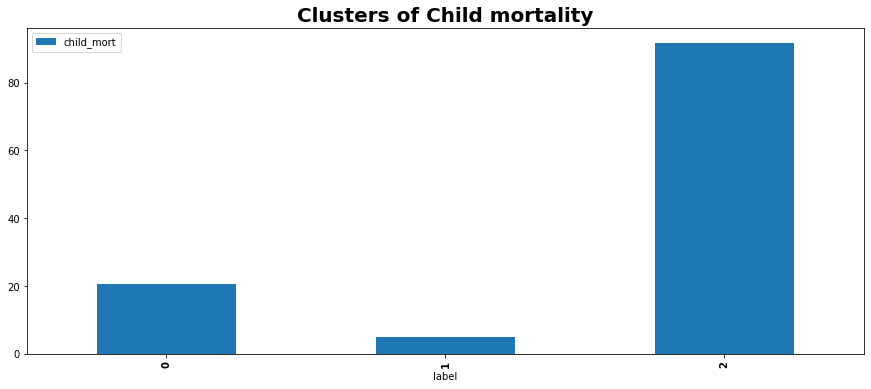

In [55]:
df_kmean.drop(['country', 'exports', 'health', 'imports','income', 'gdpp',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.title('Clusters of Child mortality', fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

### Cluster 1 is having low child mortality
### Cluster 2 is having high child mortality

### From cluster profiling in K- means clustering we can see that :
### 1. Cluster 1 is having the High income, High GDP and very Low child mortality
### 2. Cluster 2 is having very Low income, very Low GDP but High child mortality
### 3. Cluster 0 is having low income, GDP and less child mortality
### We saw in cluster profiling that cluster 2 is having low income, low GDP and High Child Mortality
### So we can say that countries under cluster 2 are in need of aid.

In [56]:
Kmean=df_kmean[df_kmean['label'] == 2]
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


### Countries we should focus more on:

In [57]:
K=Kmean[['country']]
K= K.reset_index(drop=True)
K

,country
0,Afghanistan
1,Angola
2,Benin
3,Botswana
4,Burkina Faso
5,Burundi
6,Cameroon
7,Central African Republic
8,Chad
9,Comoros


In [58]:
#Sorting based on high child mortality,low income and GDP
final=df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True])
final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0,2
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.8400,2330.0,2
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2


In [59]:
print("Top 10 countries which are in direst need of aid" )
f=final[['country']].head(10)
df_r = f.reset_index(drop=True)
df_r

Top 10 countries which are in direst need of aid


,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


###  Hierarchical Clustering

In [60]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538949,-0.350191,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272833,-0.318526,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007808,-0.291375,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695634,-0.104331,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


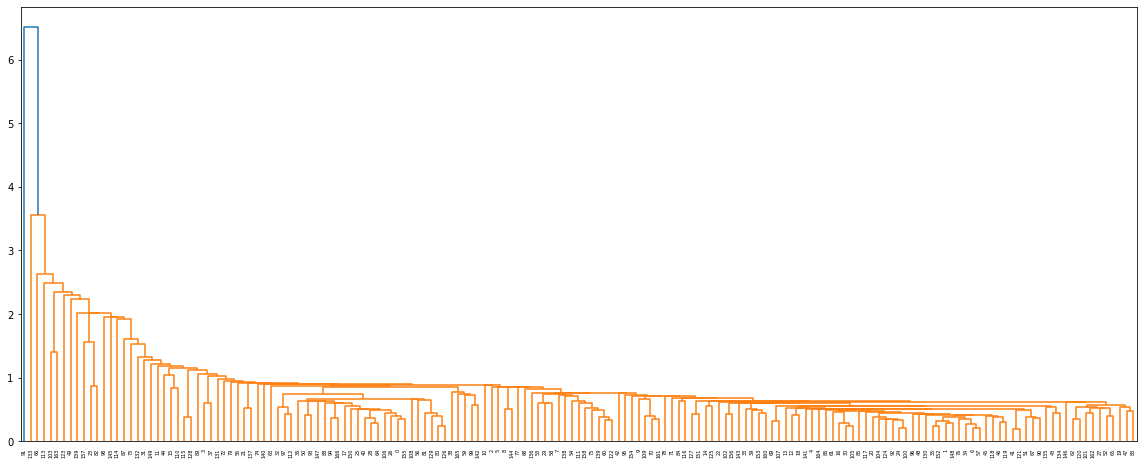

In [61]:
plt.figure(figsize = (20,8))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### We clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again

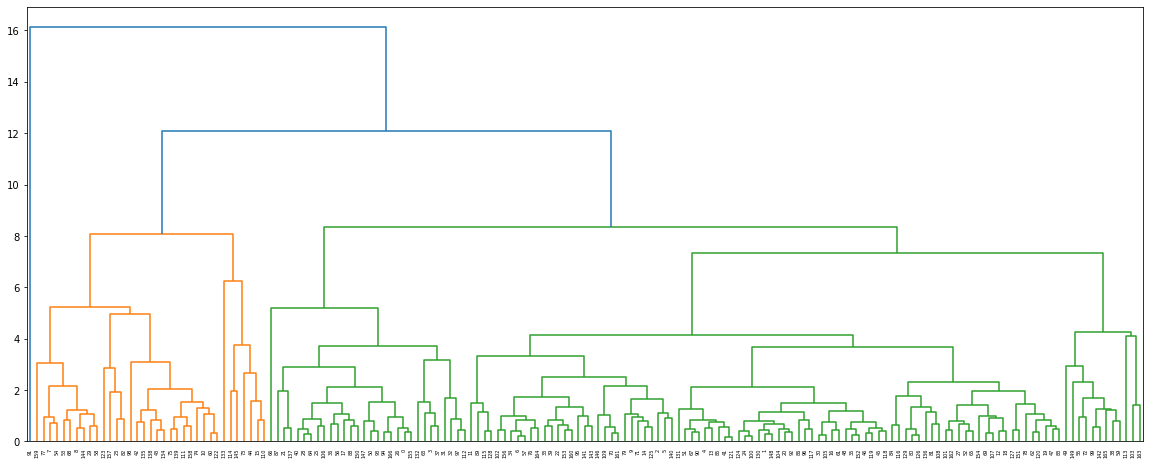

In [62]:
# complete linkage
plt.figure(figsize = (20,8))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Now we got the clear dendrogram and its easier to analyse the clusters. Lets consider a threshold value of 10. Draw the horizontal line at that height. It cuts 3 vertical lines, all of which represent a cluster.
### So we have 3 clusters now

In [63]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [64]:
# assign cluster labels
countries['cluster_labels'] = cluster_labels
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [65]:
countries.cluster_labels.value_counts()

0    131
1     35
2      1
Name: cluster_labels, dtype: int64

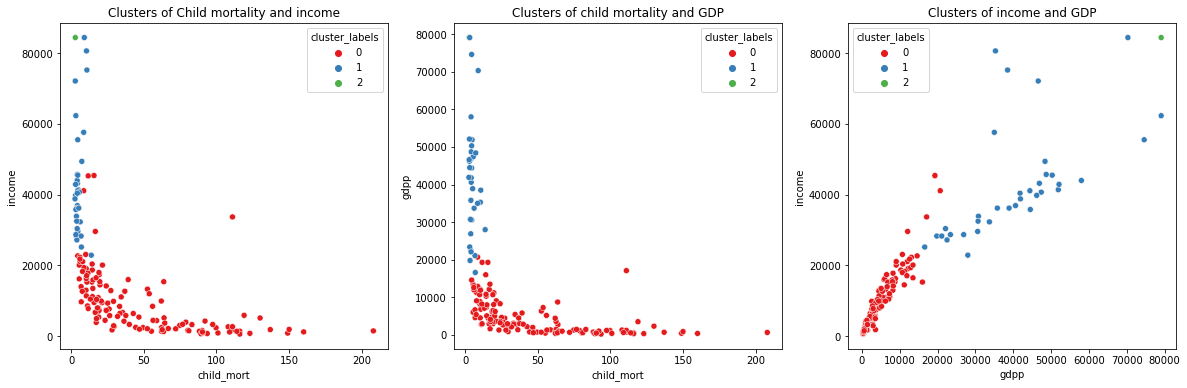

In [86]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_labels',data=countries, palette='Set1')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_labels',data=countries, palette='Set1')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',data=countries,palette='Set1')
plt.title('Clusters of income and GDP')
plt.show()

### We can see that the clusters formed are not great. Cluster 2 has only one data point.

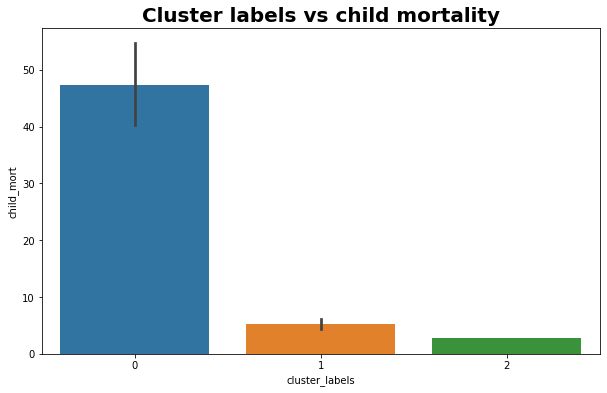

In [87]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='child_mort', data=countries)
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)
plt.show()

### Cluster 0 has high child mortality
### Cluster 1 and 2 have low child mortality

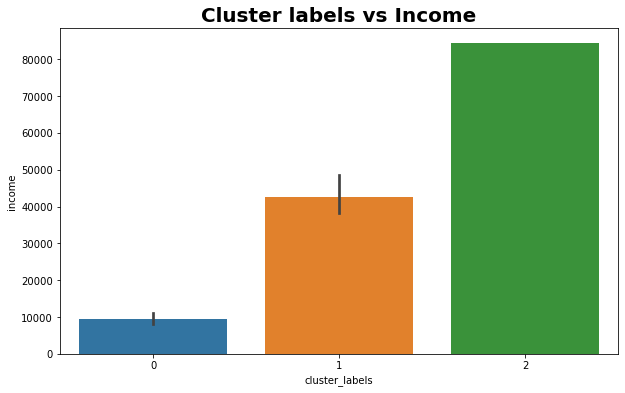

In [88]:
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='income', data=countries)
plt.title('Cluster labels vs Income',fontweight="bold", size=20)
plt.show()

### Cluster 2 has more income and cluster 1 has modertate income, cluster 0 has the least income

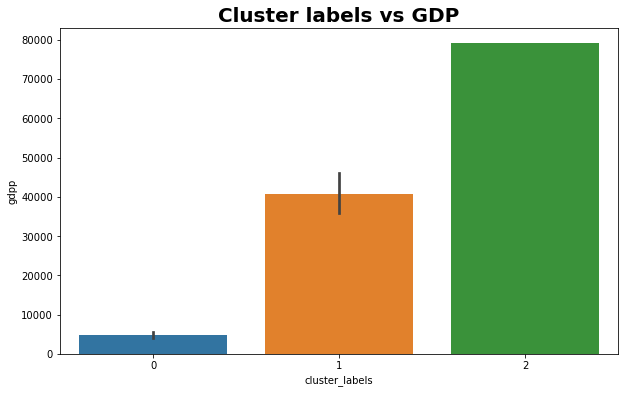

In [89]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='gdpp', data=countries)
plt.title('Cluster labels vs GDP',fontweight="bold", size=20)
plt.show()

### Cluster 0 have very low GDP, cluster 2 have high GDP and cluster 1 has moderate GDP

### From cluster profiling using hierarchical clustering we can see that :
### 1. Cluster 0 has High child mortality,very low GDP and low income. 
### 2. Cluster 1 has Low child mortality, moderate income and GDP
### 3. Cluster 2 has very low child mortality,high income and GDP

### We saw in cluster profiling that cluster 0 has low income, low GDP and High Child Mortality
### So we can say that countries under cluster 0 are in need of aid.

In [91]:
### Examining cluster 0 countries
countries[countries['cluster_labels'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [93]:
df1=countries[countries['cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], 
ascending = [False,True, True])
df1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.8400,2330.0,0
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,0


In [94]:
print("5 countries which are in direst need of aid based on hierarchical clustering" )
final_hier=df1[['country']].head()
hier= final_hier.reset_index(drop=True)
hier

5 countries which are in direst need of aid based on hierarchical clustering


,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali


### So from Hierarchical clustering, above are the five countries which are in direst need of aid

### We have analyzed both K-means and Hierarchical clustering and found clusters formed in both are not identical. The clusters formed in Hierarchical clustering are not great. So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.

### Final Analysis

### From K means clustering we got better clusters compared to Hierarchical clustering.
### Cluster 2 is the better cluster we got with High child mortality, low income and low GDP

In [107]:
#Final list of country we got are:
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,2


In [108]:
Kmean=Kmean.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True])
Kmean.head()  

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,2


In [109]:
print('10 Countries based on high child mortality, low income and low GDP')
Kmean[['country']].head(10)

10 Countries based on high child mortality, low income and low GDP


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali
113,Nigeria
112,Niger
3,Angola
37,"Congo, Dem. Rep."
25,Burkina Faso


In [110]:
##Lets choose countries based on socio economic and health factors
Kmean.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333,2.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,8.511174,6.384914,0.995640,2925.911009,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,2.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,2.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,2.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,41.478000,71.100000,6.563600,17100.000000,2.0


In [111]:
#For selected cluster Mean value of child mortality is 91.61. 
#Lets choose the countries more than this mean value as we are looking at high child mortality rates
df_final_list = Kmean[Kmean['child_mort']>91]
df_final_list.shape

(21, 11)

In [112]:
# Let's check the demographic of the resultant data again
df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,121.704762,1010.792248,83.584857,850.461429,3639.190476,11.214429,56.547619,5.386533,1708.190476,2.0
std,27.164489,3164.988809,159.534694,2143.001506,7039.657972,10.199533,7.401798,0.966908,3607.677295,0.0
min,92.100000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0
25%,108.000000,101.286000,26.796000,170.868000,1190.000000,4.150000,55.600000,5.110000,446.000000,2.0
50%,114.000000,161.424000,40.634100,279.936000,1820.000000,6.810000,57.700000,5.340000,708.000000,2.0
75%,130.000000,460.980000,64.660000,428.314000,2690.000000,17.200000,60.100000,6.160000,1200.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,41.478000,68.200000,6.563600,17100.000000,2.0


In [113]:
##Now Mean value of income is 3639. Lets choose the countries less than this mean value
df_final_list1 = df_final_list[df_final_list['income']<3639]
df_final_list1.shape

(17, 11)

In [114]:
# Let's check the demographic of the resultant data again
df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,123.747059,213.279835,43.975647,333.308235,1611.352941,7.989706,55.335294,5.415129,698.352941,2.0
std,29.176320,187.106274,26.677977,274.763937,781.538942,6.497282,7.693174,0.983881,345.567638,0.0
min,93.600000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0
25%,108.000000,81.503000,26.796000,170.200000,918.000000,2.970000,55.000000,5.110000,419.000000,2.0
50%,114.000000,137.274000,38.755000,248.508000,1430.000000,5.450000,57.300000,5.340000,648.000000,2.0
75%,137.000000,290.820000,52.269000,390.195000,1930.000000,12.300000,58.000000,6.260000,897.000000,2.0
max,208.000000,617.320000,129.870000,1181.700000,3320.000000,20.800000,68.200000,6.563600,1310.000000,2.0


In [115]:
#Now Mean value of GDP is 698. Lets choose the countries less than this mean value.
df_final_list2 = df_final_list1[df_final_list1['gdpp']<698]
df_final_list2.shape

(10, 11)

In [116]:
df_final_list2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.2860,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.81,57.9,5.8700,575.0,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.97,55.6,5.0500,547.0,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.3400,648.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2


### Final List of countries which are in need of the aid based on socio-economic factors.

In [120]:
A_countries=df_final_list2['country']
A_countries=A_countries.reset_index(drop=True)
print('Countries based on socio economic and health factors:')
A_countries

Countries based on socio economic and health factors:


0                       Haiti
1                Sierra Leone
2    Central African Republic
3                       Niger
4            Congo, Dem. Rep.
5                Burkina Faso
6               Guinea-Bissau
7                      Guinea
8                  Mozambique
9                     Burundi
Name: country, dtype: object

### Inferences

#### From the EDA performed we could see that Income, GDP and child Mortality are the major three variables need to be focused
#### In K means clustering we got Cluster 2 is having very Low income, very Low GDP but High child mortality. So we concluded that countries under cluster 2 are in need of aid.
#### In Hierarchical clustering we saw that Cluster 0 is having the High child mortality, low GDP and very Low child mortality.
#### The clusters formed in Hierarchical clustering were not that good. So we went on to consider cluster formed in K means clustering. And got top five countries with High child mortality,Low GDP and Low income
#### Then we looked for the countries based on socio economic factors

### Final top 5 countries in need of aid as per K-Means Clustering:

In [118]:
print('Top 5 Countries based on K means clustering:')
Kmean[['country']].head()

Top 5 Countries based on K means clustering:


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali


### Recommendations

#### From the analysis performed, We can see that low income people have high child mortality, so CEO must focus more on low income countries
#### We could also see Low GDP per capita countries are not having much import and export of goods and services. Those countries also must be focused
#### There are some countries which spend well on health for the people living in that country. For ex: US. Such countries can be skipped. And focus more on Burundi, Congo, Dem. Rep where the total health spending is too less.
#### If the total fertility is less the life expectency is more. Haiti is the country having very low life expectancy, and high child mortality. Its good to have less children per woman,so that they could be looked after well.